In [3]:
%matplotlib notebook

In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import brewer2mpl
import os.path
from functools import reduce
import matplotlib.cm as cm, matplotlib.font_manager as fm
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame

In [5]:
treepoints=GeoDataFrame.from_file('C:/ShapeFiles/Trees_SD/Trees_SD.shp')


In [6]:
census=GeoDataFrame.from_file('C:/ShapeFiles/CENSUS_BLOCKS_2010/CENSUS_BLOCKS_2010.shp')

<IPython.core.display.Javascript object>


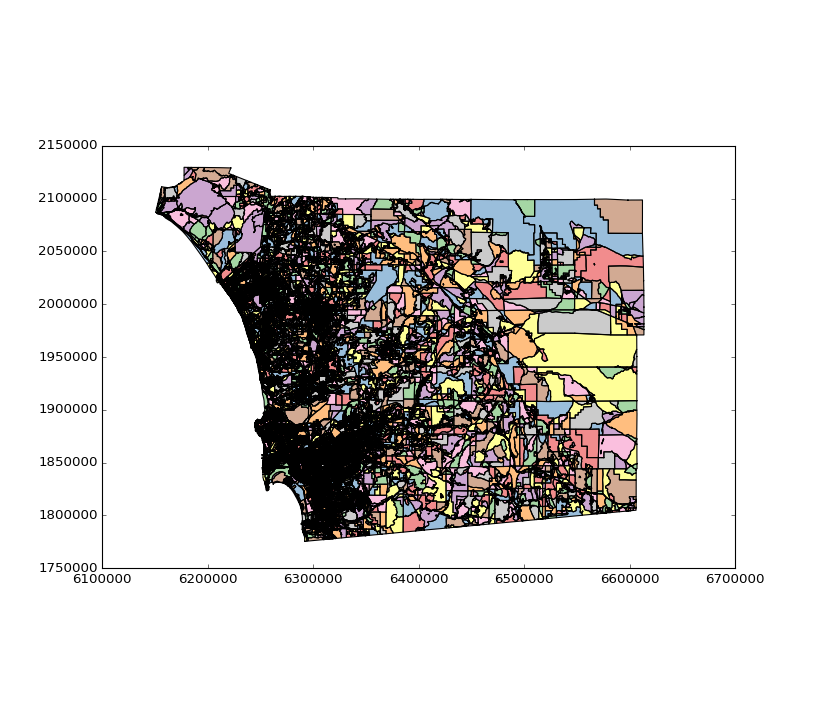

In [20]:
#census.geometry.plot()

<IPython.core.display.Javascript object>


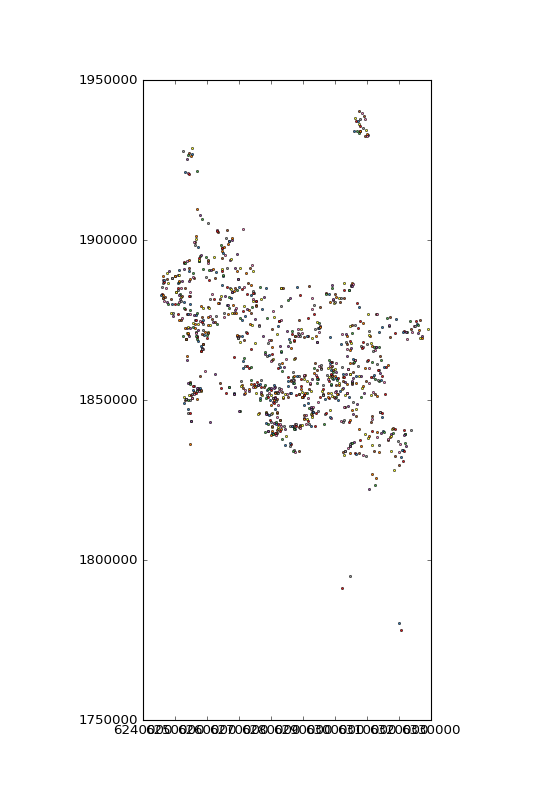

In [7]:
treepoints.geometry[0:1000].plot(figsize=(7,10))

In [8]:
SRANums=GeoDataFrame.from_file('C:/ShapeFiles/SRA/SRA2010tiger.shp')

<IPython.core.display.Javascript object>


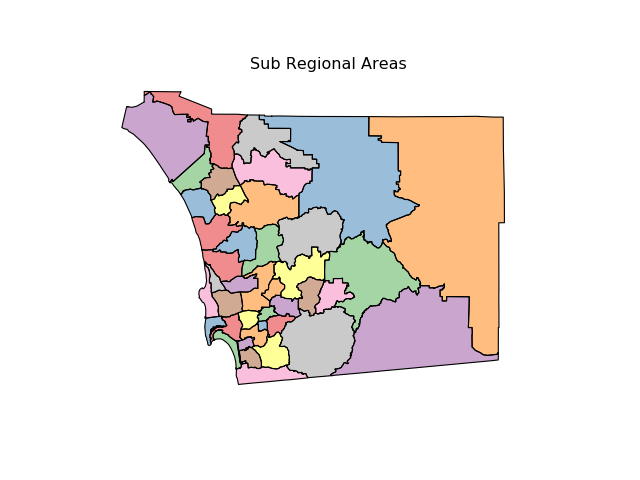

In [9]:
SRANums.geometry.plot()
plt.axis('off')
plt.title('Sub Regional Areas')

In [10]:
SRANums.head()

,NAME,SRA,geometry
0,CENTRAL SAN DIEGO,1,"POLYGON ((6291831.391448048 1858989.066273435,..."
1,PENINSULA,2,"POLYGON ((6271747.439371936 1857616.573003404,..."
2,CORONADO,3,"POLYGON ((6268054.352894944 1841291.321949599,..."
3,NATIONAL CITY,4,"POLYGON ((6306396.165897838 1832843.705761828,..."
4,SOUTHEASTERN SAN DIEGO,5,"POLYGON ((6314723.469153286 1847708.326854354,..."


In [18]:
SRAList=SRANums.geometry.as_matrix()
if not os.path.isfile('C:/git/Repos/geopandas-practice/TreeCount.csv'):
    intersections=[ reduce(lambda x,y:x+y.intersects(poly),treepoints.geometry.as_matrix(), 0) for poly in SRAList]
else:
    with open('TreeCount.csv','r') as tcFile:
        intersections=[int(row.split(',')[1][:-1]) for row in tcFile]

In [19]:
SRArea=np.array([item.area for item in SRAList])
TreesPerArea=np.array(intersections)/SRArea

In [20]:
SRANums['TreesPerArea']=TreesPerArea

<IPython.core.display.Javascript object>


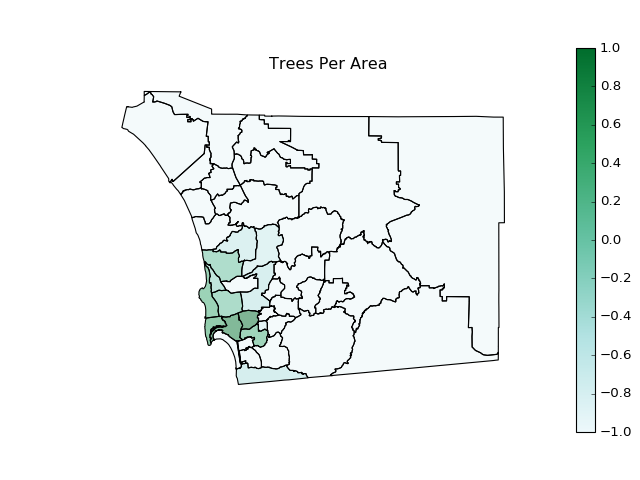

In [21]:
colormap=brewer2mpl.get_map('BuGn','Sequential',5).mpl_colormap
ax=SRANums.plot(column='TreesPerArea',cmap=colormap)
plt.axis('off')
plt.title('Trees Per Area')
vmin, vmax = -1, 1
# add colorbar
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

In [22]:
rows=[[str(i+1), str(intersections[i])] for i in range(len(intersections))]
with open('C:/git/Repos/geopandas-practice/TreeCount.csv','w') as treefile:
    [treefile.write(','.join(row)+'\n') for row in rows]
